<a href="https://colab.research.google.com/github/PrabhaKusumanchi4545/CODSOFT/blob/main/IRIS_Flower(Visualisation%2C_codesoft).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Cleaning Data**

In [2]:
df = pd.read_csv('/content/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [5]:
df['species']=df['species'].str.replace('Iris-','')

In [6]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [7]:
missing_values = df.isnull().sum()
percentage_missing = (missing_values/len(df))*100
pd.DataFrame({'missing_values': missing_values,'percentage_missing': percentage_missing})

,missing_values,percentage_missing
sepal_length,0,0.0
sepal_width,0,0.0
petal_length,0,0.0
petal_width,0,0.0
species,0,0.0


All the data is already cleaned no need to do anything

**Data Visualization**

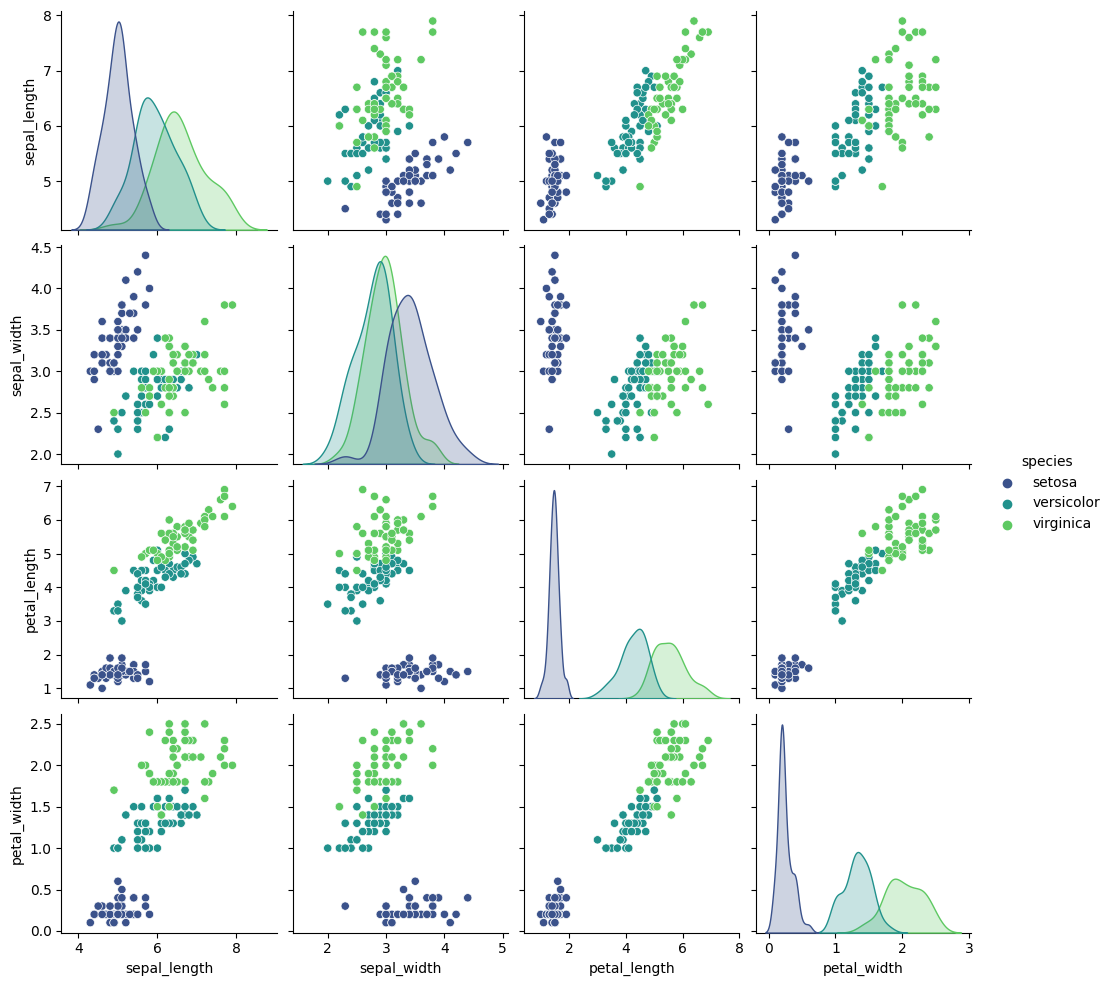

In [8]:
green_palette = sns.color_palette("viridis", n_colors=3)
sns.pairplot(df,hue='species',palette=green_palette)
plt.show()

Following graphs show the distribution of features for every specie

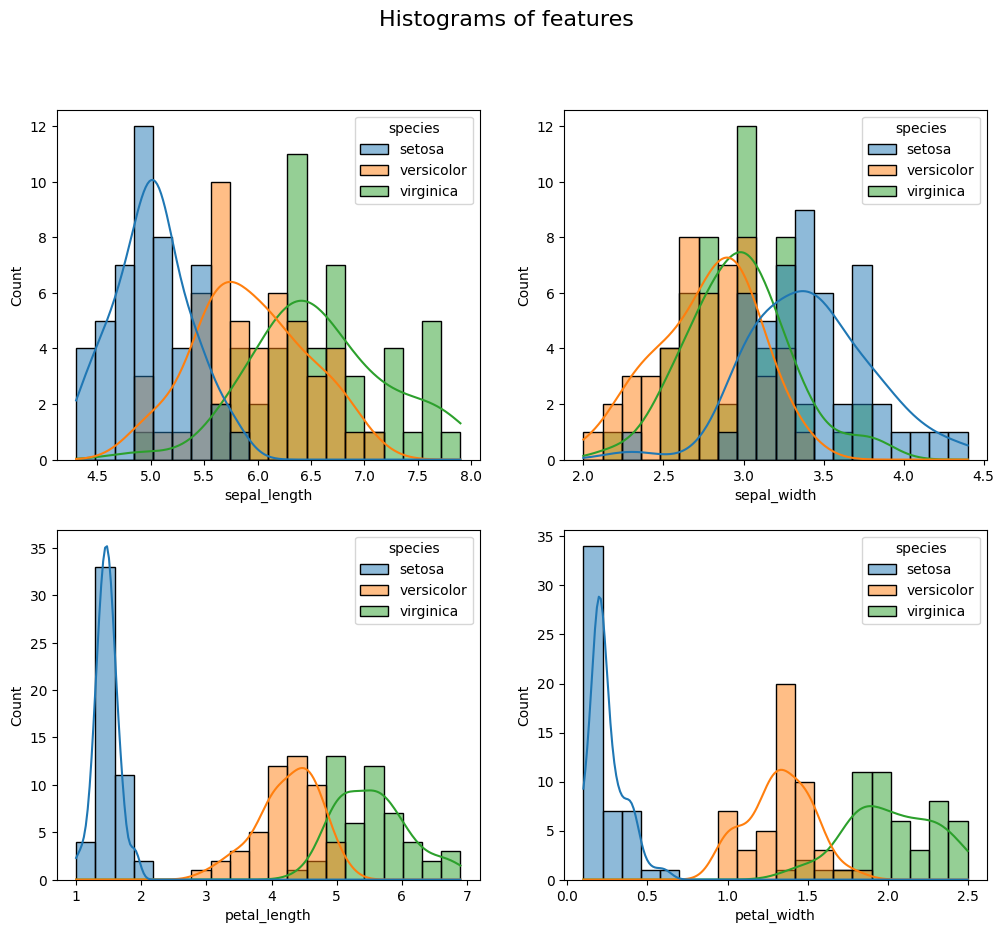

In [9]:
num_columns = list(df.select_dtypes(include=['float']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.histplot(data=df,x=num_columns[0],kde=True,bins=20,hue='species',ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of features', fontsize=16)
plt.show()

Following graphs shows that the width is less tha the length for both petal and sepals

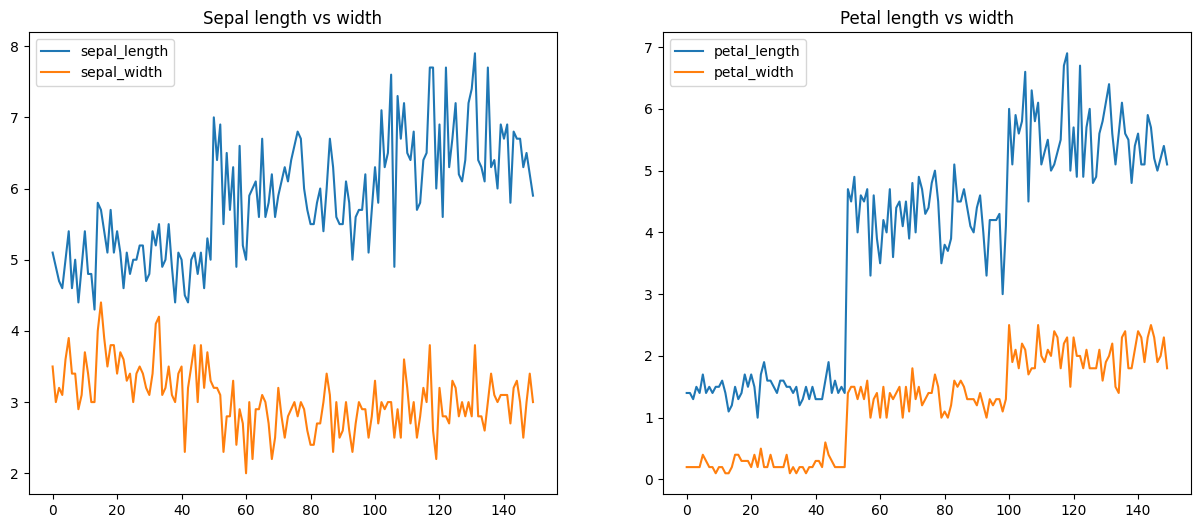

In [10]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
ax[0].plot(df['sepal_length'])
ax[0].plot(df['sepal_width'])
ax[0].set_title('Sepal length vs width')
ax[0].legend(['sepal_length','sepal_width'])
ax[1].plot(df['petal_length'])
ax[1].plot(df['petal_width'])
ax[1].set_title('Petal length vs width')
ax[1].legend(['petal_length','petal_width'])
plt.show()

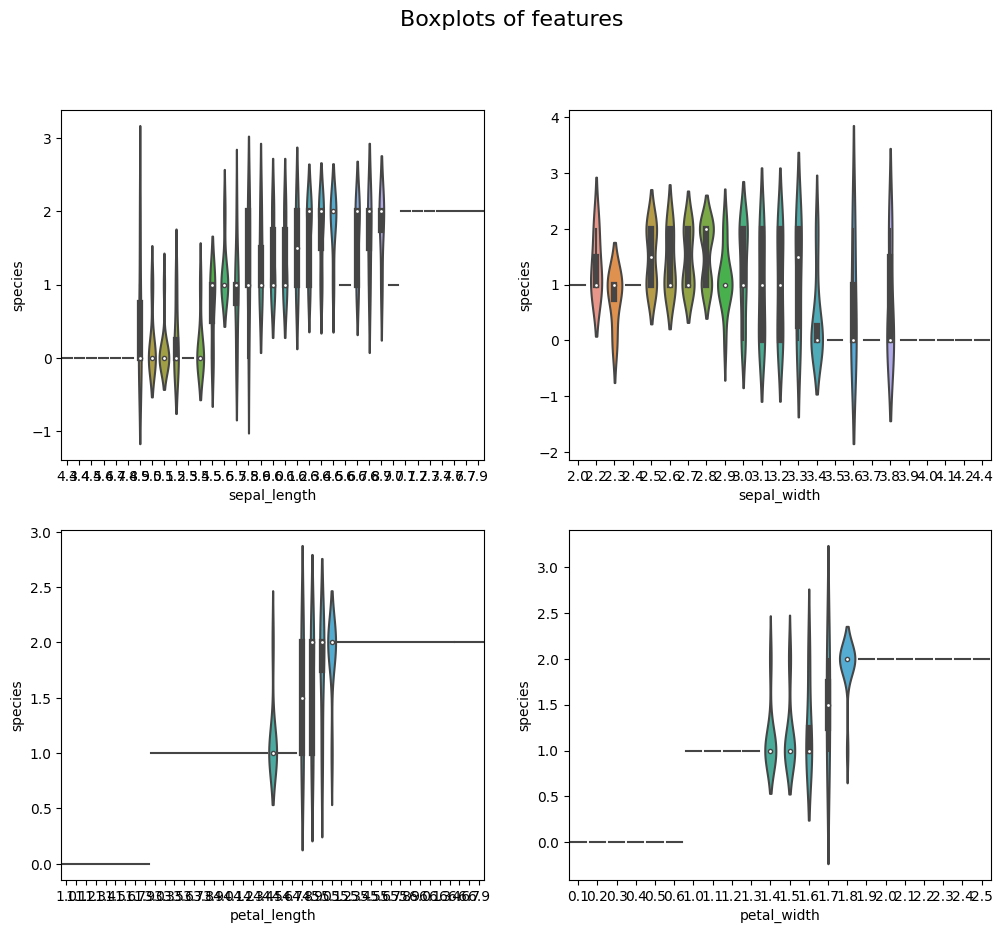

In [15]:
num_columns = list(df.select_dtypes(include=['float']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.violinplot(data=df,x=num_columns[0],y='species',ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Boxplots of features', fontsize=16)
plt.show()

**Model Building**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [13]:
df['species'] = LabelEncoder().fit_transform(df['species'])
X = df.drop(['species'],axis=1)
y = df['species']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
lg = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [14]:
models = [lg,dt,knn]
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f'Accuracy score of {model} is {accuracy_score(y_test,y_pred)}')

Accuracy score of LogisticRegression() is 1.0
Accuracy score of DecisionTreeClassifier() is 1.0
Accuracy score of KNeighborsClassifier() is 1.0
